# Keras Classification

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

## Set up

### Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data

In [2]:
df = pd.read_csv('cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

No missing info

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

Let's start with a countplot of the response variable to explore the balance.

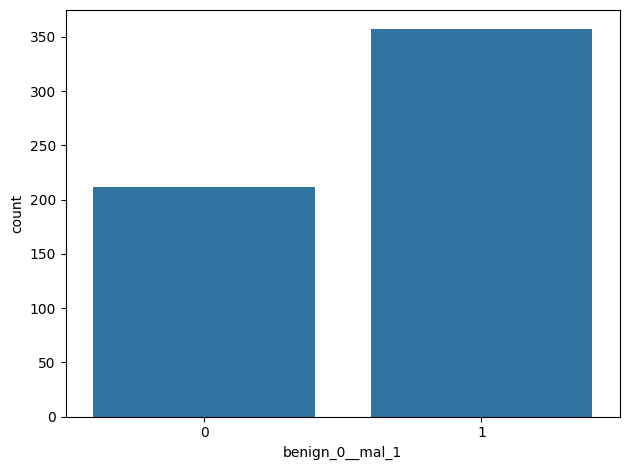

In [5]:
sns.countplot(x = 'benign_0__mal_1', data = df)
plt.tight_layout()

There are some obvious differences, but not extreme. This is a relatively balanced response.

We can now explore the correlation of the predictors and the response to have an overview of expected variable importance.

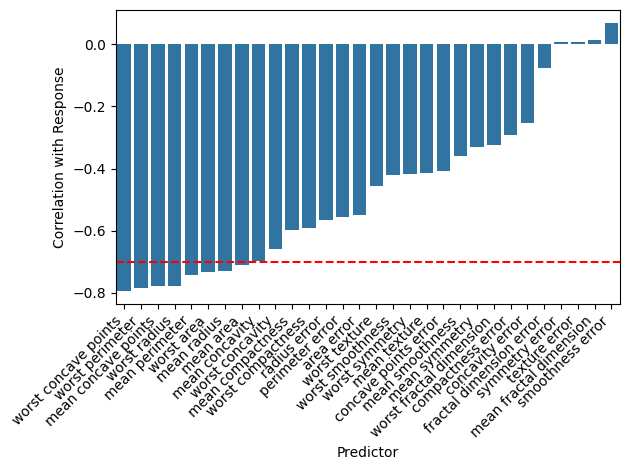

In [29]:
corrs = pd.DataFrame(df.corr()['benign_0__mal_1'].sort_values().reset_index())
corrs.columns = ['Predictor','Correlation with Response']
corrs = corrs.iloc[:-1,:] # remove self correlation
sns.barplot(x = 'Predictor', y = 'Correlation with Response', data = corrs)
#plt.axhline(y = 0.7, linestyle = '--', color = 'r')
plt.axhline(y = -0.7, linestyle = '--', color = 'r')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()

We can see that the most correlated features to the label are `worst convave point`, `worst perimeter`, `mean concave points`, `main perimeter`, etc

We can also explore the correlation among the features themselves to gain a bit more information about potentially redundant information.

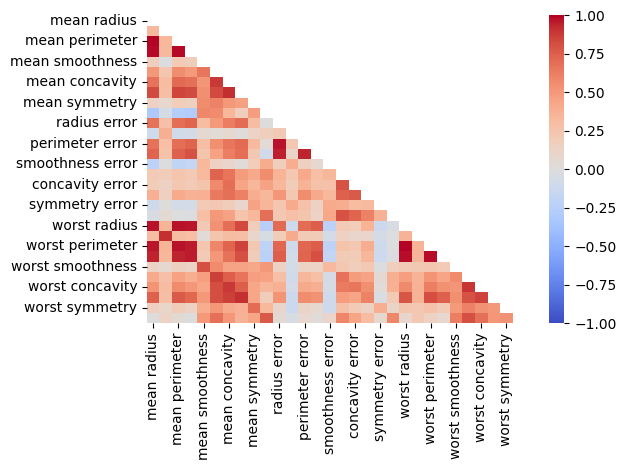

In [37]:
corr = df.drop('benign_0__mal_1', axis = 1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,
            mask = mask,
            cmap = 'coolwarm',
            vmin = -1,
            vmax = 1)
plt.tight_layout()

We can see quite a bit of correlation among many variables, with a correlation value of around 100%.

## Pre-processing
* Train-Test split
* Scaling

In [40]:
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [41]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler = MinMaxScaler()

In [52]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Create and fit the model

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [53]:
X_train.shape # this shape will help define the bagging and number of neuros

(426, 30)

In [54]:
model = Sequential()

model.add(Dense(30,activation='relu')) # 30 neuron for 30 features
model.add(Dense(15,activation='relu')) # cutting half

# Binary classification - we want the last activation to be sigmoid (0-1)
model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='adam')

2025-11-11 11:25:33.315218: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-11-11 11:25:33.315272: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-11-11 11:25:33.315280: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2025-11-11 11:25:33.315477: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-11 11:25:33.315497: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [55]:
model.fit(x = X_train,
          y = y_train,
          epochs = 600, # aim to overfit to practice some other model optimisation techniques
          validation_data= (X_test, y_test)
         )

Epoch 1/600


2025-11-11 11:26:47.133865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.7417 - val_loss: 0.7326
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7167 - val_loss: 0.7031
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6767 - val_loss: 0.6550
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6335 - val_loss: 0.6170
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5924 - val_loss: 0.5761
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5489 - val_loss: 0.5291
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5038 - val_loss: 0.4830
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4582 - val_loss: 0.4323
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4131 - val_loss: 0.3886
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3712 - val_loss: 0.3463
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3339 - val_loss: 0.3130
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3064 - val

Let's explore potential overfitting by retrieving and plotting the **loss**

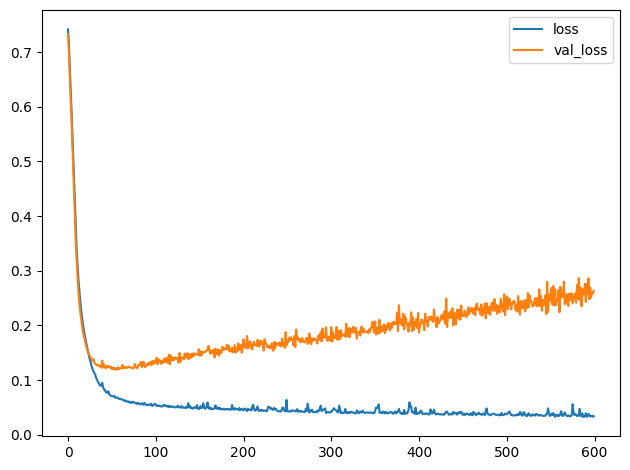

In [58]:
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.tight_layout()

Here we have a perfect example of overfitting, where the validation loss start increasing as the training loss keeps going down. This means we are fitting the model with too many epochs, and the model start getting worse due to overfitting, basically meaning that it progressively does worse at predicting new data.

## Model optimisation

### Early stopping

First, we need to create a fresh model, so there is not influence from the previous fit.

In [59]:
model = Sequential()

model.add(Dense(30,activation='relu')) # 30 neuron for 30 features
model.add(Dense(15,activation='relu')) # cutting half

# Binary classification - we want the last activation to be sigmoid (0-1)
model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='adam')

In [60]:
from tensorflow.keras.callbacks import EarlyStopping

We will be tracking validation plot for early stopping. So, we will stop training when the monitored metric has stopped improving with the goal of minimising loss.

In [63]:
early_stop = EarlyStopping(monitor='val_loss', # monitored metric (validation with test data)
                          mode = 'min', # training will stop when the quantity monitored has stopped decreasing
                          # if we were monitoring accuracy, for example, we would want the mode to be 'max'.
                          verbose = 1,
                          patience = 25) # we will wait 25 epochs after detecting our stopping point, just to have a bit of buffer against the noise

In [64]:
model.fit(x = X_train,
          y = y_train,
          epochs = 600, # aim to overfit to practice some other model optimisation techniques
          validation_data= (X_test, y_test),
          callbacks=[early_stop]
         )

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.6856 - val_loss: 0.6544
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6526 - val_loss: 0.6229
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6187 - val_loss: 0.5884
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5816 - val_loss: 0.5511
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5427 - val_loss: 0.5112
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4995 - val_loss: 0.4661
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4546 - val_loss: 0.4215
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4104 - val_loss: 0.3759
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3692 - val_loss: 0.3372
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3329 - val_loss: 0.3015
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3029 - val_loss: 0.2720
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss:

We see that even though we provided a very large number of epochs, we got the early stop at 69.

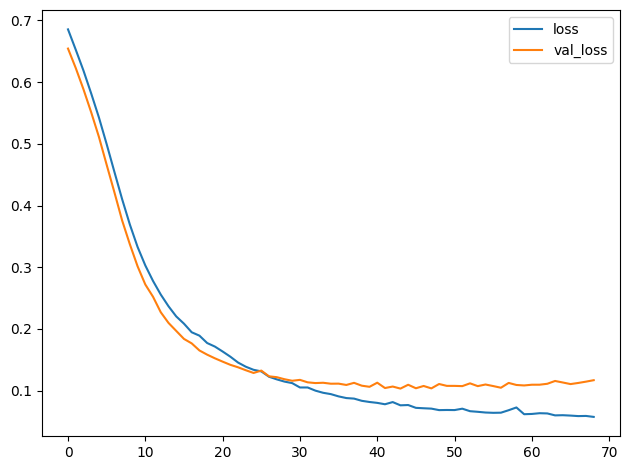

In [65]:
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.tight_layout()

This is confirmed by the loss plot. See clear a significant decrease in overfitting - improving the model performance.

### Drop-outs

In [66]:
model = Sequential()

model.add(Dense(30,activation='relu')) # 30 neuron for 30 features
model.add(Dropout(rate = 0.5)) # Dropout will randomly turn off neurons to optimise the model even further
# usually the values go between 0.2-0.5. This means that after each batch, the model will randomly drop 20-50% of the neurons


model.add(Dense(15,activation='relu')) # cutting half
model.add(Dropout(rate = 0.5)) # we do this after each layer as the position determines where neurons are being dropped

# Binary classification - we want the last activation to be sigmoid (0-1)
model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='adam')

In [67]:
early_stop = EarlyStopping(monitor='val_loss', # monitored metric (validation with test data)
                          mode = 'min', # training will stop when the quantity monitored has stopped decreasing
                          # if we were monitoring accuracy, for example, we would want the mode to be 'max'.
                          verbose = 1,
                          patience = 25) # we will wait 25 epochs after detecting our stopping point, just to have a bit of buffer against the noise

In [68]:
model.fit(x = X_train,
          y = y_train,
          epochs = 600, # aim to overfit to practice some other model optimisation techniques
          validation_data= (X_test, y_test),
          callbacks=[early_stop]
         )

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.8370 - val_loss: 0.7059
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7906 - val_loss: 0.6789
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7482 - val_loss: 0.6567
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7696 - val_loss: 0.6363
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7170 - val_loss: 0.6186
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6846 - val_loss: 0.6023
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6564 - val_loss: 0.5856
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6725 - val_loss: 0.5692
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6236 - val_loss: 0.5516
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6242 - val_loss: 0.5333
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5918 - val_loss: 0.5126
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

We see that the model run for a bit longer. That is good. It is reflecting that the model will learn for longer due to the dropouts.

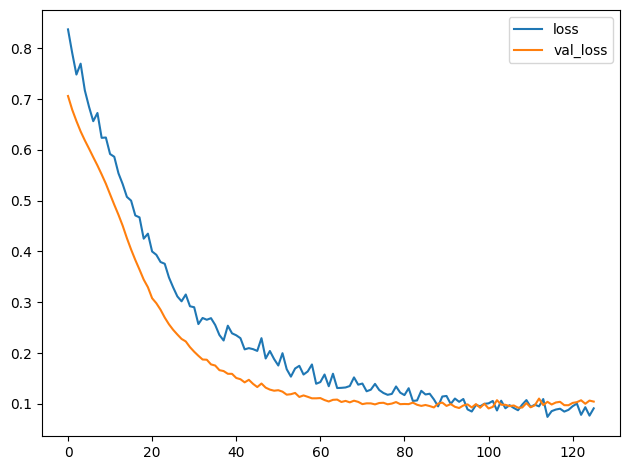

In [69]:
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.tight_layout()

This now looks fantastic! We can se the total and validation loss flattening out simultaneously. A good indication that the model predictive power is great. **Adding the early stopping and the dropout layers have significantly increased the model's performance**.

## Model evaluation

In [72]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [73]:
from sklearn.metrics import classification_report, confusion_matrix

In [74]:
print('================')
print('Model evaluation')
print('================')
print('\n')
print('Confusion matrix')
print('----------------')
print(confusion_matrix(y_test,predictions))
print('\n')
print('Classification report')
print('---------------------')
print(classification_report(y_test,predictions))

Model evaluation


Confusion matrix
----------------
[[54  1]
 [ 2 86]]


Classification report
---------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



The model demonstrates excellent and well-balanced performance in distinguishing between benign (class 0) and malignant (class 1) cancer cases. The confusion matrix shows that out of 143 test samples, only three were misclassified—one benign case was incorrectly labeled as malignant, and two malignant cases were incorrectly labeled as benign. In other words, the model correctly identified 54 out of 55 benign cases and 86 out of 88 malignant cases, achieving an overall accuracy of approximately 98%.

The classification report reinforces this result. For benign tumors (class 0), precision was 0.96 and recall was 0.98, indicating that 96% of the predicted benign cases were correct and that the model successfully detected 98% of all true benign samples. For malignant tumors (class 1), both precision and recall were 0.99 and 0.98 respectively, meaning the model almost never misclassified malignant cases. The F1-scores—0.97 for benign and 0.98 for malignant—show a strong balance between precision and recall. The overall accuracy, macro average, and weighted average metrics were all 0.98, suggesting consistently high performance despite a slight class imbalance.

In practical terms, this model can very reliably differentiate between benign and malignant tumors, with a particularly strong ability to identify malignant cases—crucial in medical screening contexts where false negatives carry high risk. The low number of misclassifications indicates that the model has effectively learned the discriminative features between the two categories. Still, for deployment or clinical interpretation, it would be important to validate the model on an independent dataset to confirm that this high accuracy generalizes beyond the current sample.

# === End of Project! ===